In [75]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

In [76]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h


In [77]:
def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

In [78]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

Thetas:[[-27.94270719]
 [ 10.60319812]]
nan


C:\Users\Pawel\AppData\Local\Temp\ipykernel_29552\2365755841.py:4: RuntimeWarning: divide by zero encountered in log
  y_0 = -(1-y)*np.log(1-h)
C:\Users\Pawel\AppData\Local\Temp\ipykernel_29552\2365755841.py:4: RuntimeWarning: invalid value encountered in multiply
  y_0 = -(1-y)*np.log(1-h)


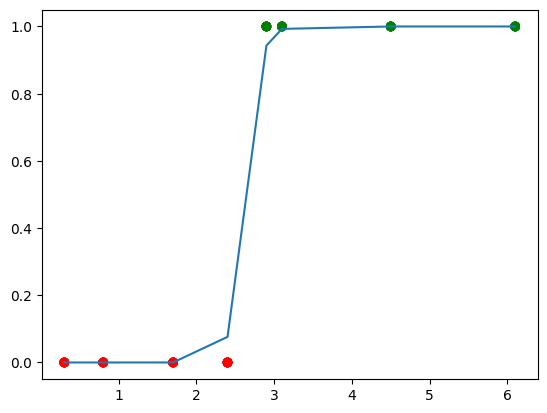

In [79]:
eps = 1e-10
alpha = 1e-2
theta = np.array([[0], [0]])



cost_old = calculate_cost(X,y,theta)
cost_new = np.inf

m = X.shape[1]



while abs(cost_old - cost_new) > eps:
    grad0 = 0
    grad1 = 0

    # for i in range(m):
    #     grad1 += (h_fun(x[i],theta) - y[i]) * x[i]

    h_y_diff = (h_fun(X, theta) - y)
    
    gradient = h_y_diff @ X.T
    theta = theta - (alpha / m) * gradient.T
    
   

    cost_old = cost_new
    cost_new = calculate_cost(X,y,theta)


print(f"Thetas:{theta}")
print(cost_new)



y_reg = h_fun(X,theta)

X_1 = X[1]
X_1.shape = (1,8)

colors = ['red' if x == 0 else 'green' for x in y[0]]
labels = {0: "Nie należy do klasy", 1: "Należy do klasy"}

plt.plot(np.array(X_1).reshape(-1), np.array(y_reg).reshape(-1))
for i in range(len(X[1])):
    plt.scatter(X[1],y,color=colors,label=labels[X[0][i]])

plt.show()


X.shape=(3, 100)
y.shape=(1, 100)
Należy do klasy
1.0
60.18259938620976


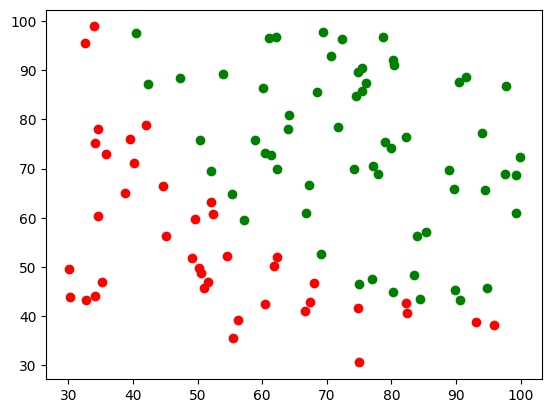

In [ ]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

colors = ['red' if x == 0 else 'green' for x in y[0]]
labels = {0: "Nie należy do klasy", 1: "Należy do klasy"}


for i in range(len(X[0])):
    plt.scatter(X[1][i],X[2][i],color=colors[i],label=labels[X[0][i]])
